# 1) Завантажити дані, вивести назви колонок і розмір датасета

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


# Завантажуємо датасет Titanic
url='https://drive.google.com/file/d/1QFzghQ5iBStsVt8ktLIAVFBK6RsppeHp/view?usp=sharing'
url_='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url_)

# Виведемо назви колонок і розмір датасета
print("Назви колонок:")
print(df.columns)
print("\nРозмір датасету:", df.shape)

df.head()

Назви колонок:
Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

Розмір датасету: (214, 11)


,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# 2) Опрацювати пропуски (по можливості заповнити їх або видалити)

In [3]:
print("Пропуски в даних:\n", df.isnull().sum())

Пропуски в даних:
 Id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64


## 3) Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою); побудувати гістограми розподілу ознак і boxplot-и ознак відносно цільової змінної

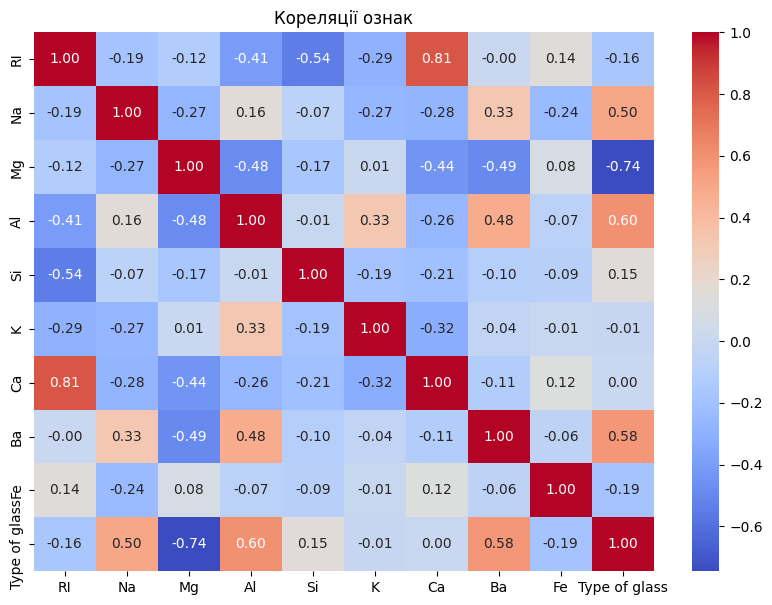

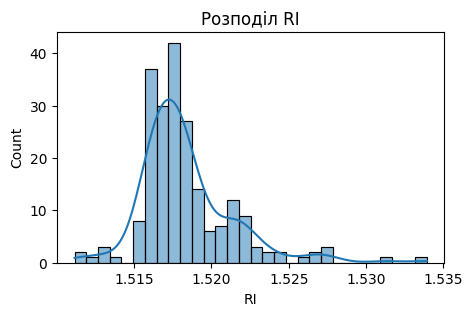

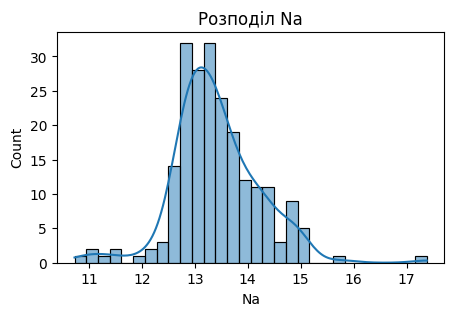

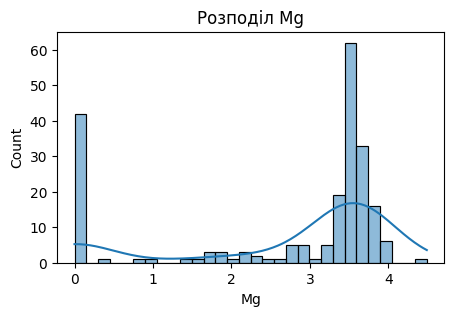

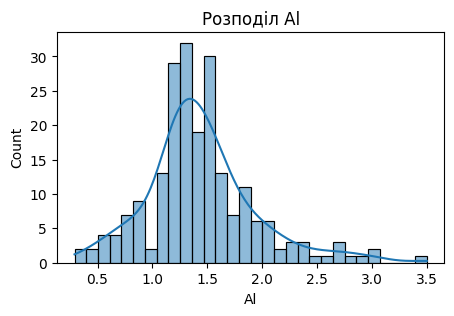

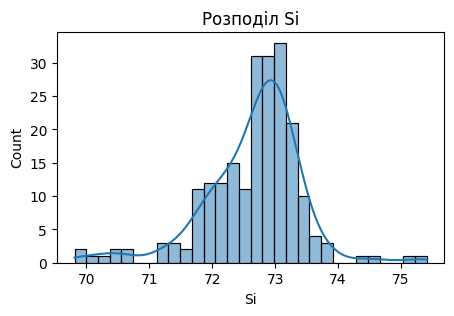

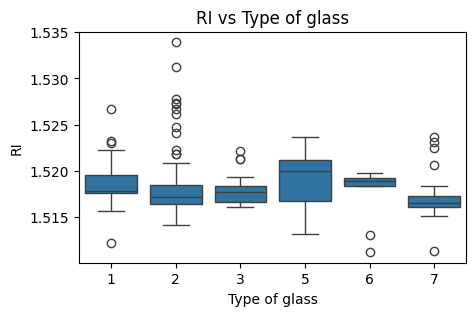

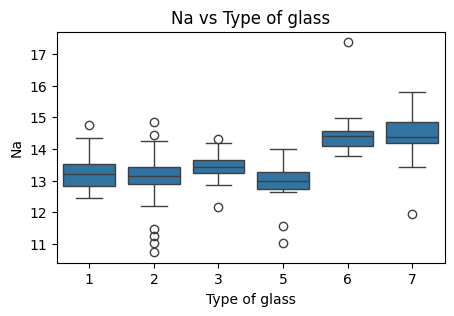

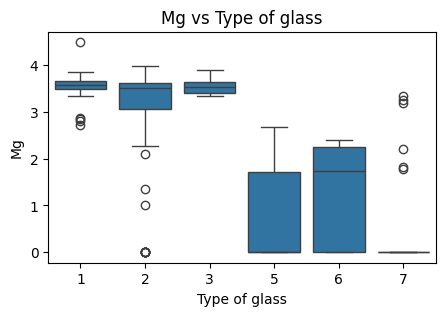

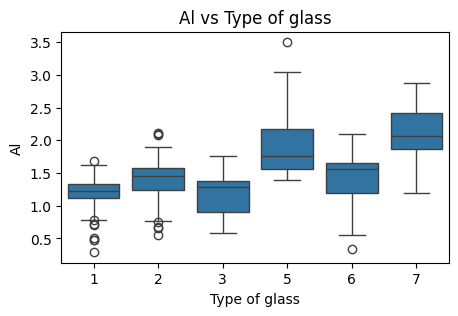

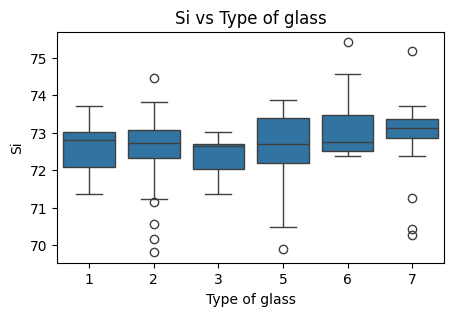

In [4]:
# Кореляційна матриця (без Id)
plt.figure(figsize=(10,7))
sns.heatmap(df.drop(columns=["Id"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Кореляції ознак")
plt.show()

# Гістограми
features = ["RI", "Na", "Mg", "Al", "Si"]
for col in features:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Розподіл {col}")
    plt.show()

# Boxplot-и
for col in ["RI", "Na", "Mg", "Al", "Si"]:
    plt.figure(figsize=(5,3))
    sns.boxplot(x="Type of glass", y=col, data=df)
    plt.title(f"{col} vs Type of glass")
    plt.show()

# 4) Нормалізувати дані


In [5]:
# Відділяємо ознаки і ціль
X = df.drop(columns=["Id", "Type of glass"])
y = df["Type of glass"]

# Масштабування ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Тренувальна і тестова вибірки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Розмір X_train:", X_train.shape, "X_test:", X_test.shape)


Розмір X_train: (171, 9) X_test: (43, 9)


# 5) Провести навчання наступних класифікаторів:
kNN
дерево ухвалення рішень
SVM
Random Forest
AdaBoost
Підібрати оптимальні параметри
• для kNN
• для SVM за допомогою GridSearch підібрати оптимальні «C» і «gamma»


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

models = {}

# kNN з GridSearch
knn = KNeighborsClassifier()
param_grid = {"n_neighbors": range(1, 21)}
grid_knn = GridSearchCV(knn, param_grid, cv=5, scoring="accuracy")
grid_knn.fit(X_train, y_train)
models["kNN"] = grid_knn.best_estimator_
print("kNN оптимальні параметри:", grid_knn.best_params_)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
models["DecisionTree"] = dt

# SVM з GridSearch
svm = SVC()
param_grid = {"C":[0.1,1,10], "gamma":[0.01,0.1,1], "kernel":["rbf"]}
grid_svm = GridSearchCV(svm, param_grid, cv=5, scoring="accuracy")
grid_svm.fit(X_train, y_train)
models["SVM"] = grid_svm.best_estimator_
print("SVM оптимальні параметри:", grid_svm.best_params_)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
models["RandomForest"] = rf

# AdaBoost
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)
models["AdaBoost"] = ada


kNN оптимальні параметри: {'n_neighbors': 1}
SVM оптимальні параметри: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


# Серед обраних оптимальних моделей кожного класу вибрати найкращу.
Відобразити
sklearn.metrics.classification_report і sklearn.metrics.confusion_matrix



In [7]:
from sklearn.metrics import accuracy_score

best_model = None
best_acc = 0

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n===== {name} =====")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    if acc > best_acc:
        best_acc = acc
        best_model = (name, model)

print("\nНайкраща модель:", best_model[0], "з accuracy =", best_acc)



===== kNN =====
Accuracy: 0.6976744186046512
Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.57      0.67        14
           2       0.62      0.67      0.65        15
           3       0.40      0.67      0.50         3
           5       0.75      1.00      0.86         3
           6       0.50      0.50      0.50         2
           7       1.00      1.00      1.00         6

    accuracy                           0.70        43
   macro avg       0.68      0.73      0.69        43
weighted avg       0.72      0.70      0.70        43

Confusion Matrix:
 [[ 8  4  2  0  0  0]
 [ 2 10  1  1  1  0]
 [ 0  1  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  1  0  0  1  0]
 [ 0  0  0  0  0  6]]

===== DecisionTree =====
Accuracy: 0.6744186046511628
Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.71      0.74        14
           2       0.70      0.47      0.56        15